## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [322]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import warnings
warnings.filterwarnings('ignore')

import sklearn 
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split



### Load the dataset

In [190]:
df=pd.read_csv('C:\\Users\\Vamsi Apuroop M\\Downloads\\archive\\tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1. Make a list of categorical and numerical columns in the data.

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


### 2. Compute the average bill amount for each day.

In [12]:
df.groupby('day')['total_bill'].mean()

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

### 3. Which gender is more generous in giving tips?

In [20]:
df.groupby('sex')['tip'].sum().sort_values(ascending=False).head(1)


sex
Male    485.07
Name: tip, dtype: float64

### 4. According to the data, were there more customers for dinner or lunch?

In [21]:
df.head(20)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [34]:
df.groupby('time')['size'].sum().sort_values(ascending=False).head(1)


time
Dinner    463
Name: size, dtype: int64

### 5. Based on the statistical summary, comment on the variable 'tip'

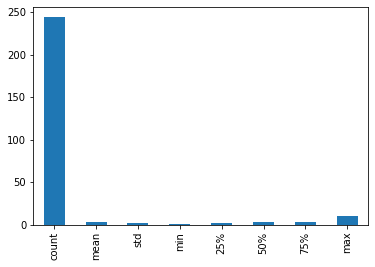

In [44]:
df['tip'].describe().plot.bar(stacked=True)
plt.show()

### 6. Find the busiest day in terms of the orders?

In [50]:
df.head()
df.groupby('day')['size'].sum().sort_values(ascending=False).head(1)

day
Sat    219
Name: size, dtype: int64

### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

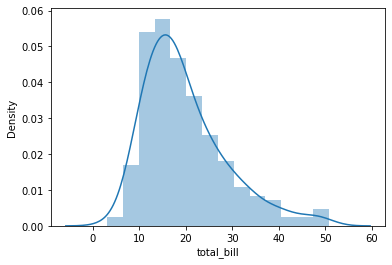

In [64]:
df.skew()
sns.distplot(df['total_bill'])

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

In [69]:
df[['tip','total_bill']]

,tip,total_bill
0,1.01,16.99
1,1.66,10.34
2,3.50,21.01
3,3.31,23.68
4,3.61,24.59
...,...,...
239,5.92,29.03
240,2.00,27.18
241,2.00,22.67
242,1.75,17.82


AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xlim'

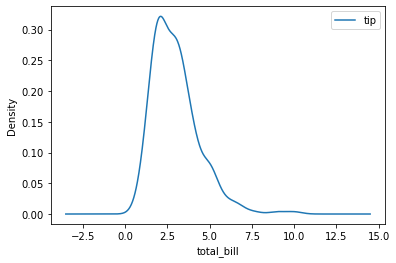

In [125]:
df.plot(kind='kde',x='total_bill',y='tip')
plt.xlabel("total_bill")
plt.ylabel("tip")

### 9. What is the percentage of males and females in the dataset? and display it in the plot

In [111]:
df_female=df['sex'].eq('Female').values.sum()
df_male=df['sex'].eq('Male').values.sum()



87 157


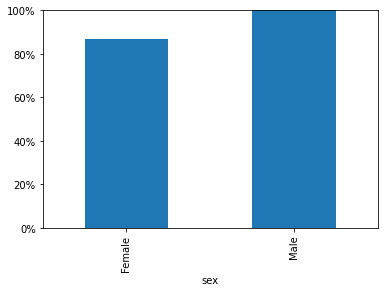

In [124]:
df_plot=df.groupby('sex')['sex'].count().plot(kind="bar")
df_plot.set_ylim(0,100)
df_plot.yaxis.set_major_formatter(mtick.PercentFormatter())



### 10. Compute the gender-wise count based on smoking habits and display it in the plot

<AxesSubplot:ylabel='sex'>

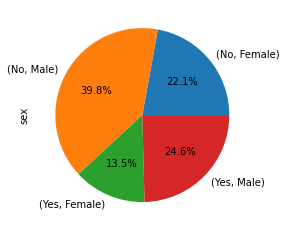

In [133]:
df.head()
df.groupby(['smoker','sex'])['sex'].count().plot(kind="pie",autopct="%.1f%%")

### 11. Compute the average tip amount given for different days and display it in the plot.

<AxesSubplot:xlabel='day'>

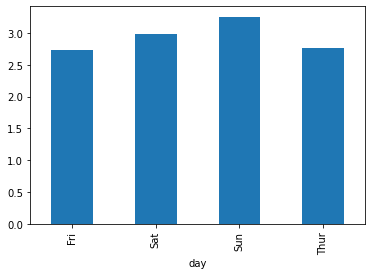

In [138]:
df.groupby('day')['tip'].mean().plot(kind="bar")

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

Text(0, 0.5, 'average Bill')

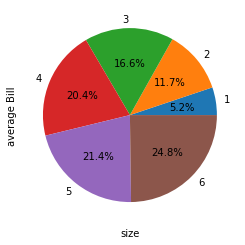

In [144]:
df.groupby('size')['total_bill'].mean().plot(kind="pie",autopct="%.1f%%")
plt.xlabel("size")
plt.ylabel("average Bill")

### 13. Plot a horizontal boxplot to compare the bill amount based on gender

<AxesSubplot:title={'center':'total_bill'}, xlabel='sex'>

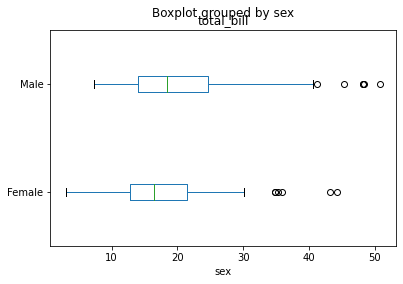

In [163]:
df.boxplot(by='sex',column=['total_bill'],grid=False,vert=False)

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

<AxesSubplot:xlabel='day'>

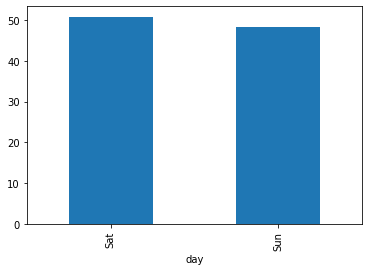

In [200]:
df_sat_sun=df.loc[df['day'].isin(['Sun','Sat'])]
df_sat_sun.groupby('day')['total_bill'].max().plot(kind="bar")

### 15. Compute the percentage of missing values in the dataset.

In [210]:
df_null=df.isnull().sum()
df_notnull=df.count()
df_percentage=(df_null/df_notnull)*100
df_percentage

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [220]:
df.duplicated().sum()

1

In [219]:
df.drop_duplicates()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

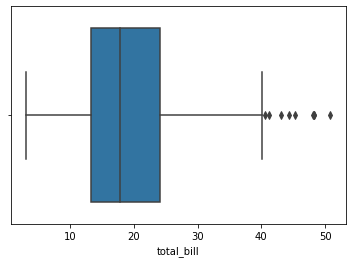

In [228]:
outliers= sns.boxplot(df['total_bill'])

In [229]:
df['total_bill'].skew()

1.1332130376158205

<AxesSubplot:xlabel='total_bill'>

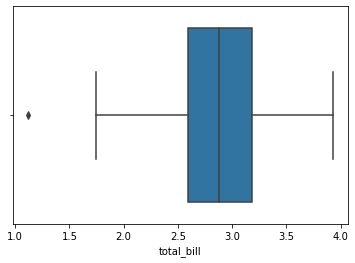

In [230]:
df_log=np.log(df['total_bill'])
sns.boxplot(df_log)

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

<AxesSubplot:xlabel='tip'>

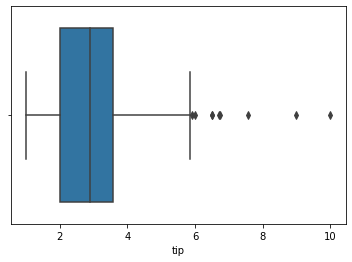

In [232]:
sns.boxplot(df['tip'])

In [234]:
Q1=df['tip'].quantile(0.25)
Q3=df['tip'].quantile(0.75)

In [236]:
IQR=Q3-Q1

In [241]:
print(Q1)
print(Q3)
print(IQR)


2.0
3.5625
1.5625


In [244]:
lower_whisker=Q1-(1.5*IQR)
upper_whisker=Q3+(1.5*IQR)

In [270]:
df_result=df.loc[(df['tip']< upper_whisker) & (df['tip']>lower_whisker)]
print(df_result)

     total_bill   tip  sex  smoker  day  time  size
0         16.99  1.01    0       0    2     0     2
1         10.34  1.66    1       0    2     0     3
2         21.01  3.50    1       0    2     0     3
3         23.68  3.31    1       0    2     0     2
4         24.59  3.61    0       0    2     0     4
..          ...   ...  ...     ...  ...   ...   ...
238       35.83  4.67    0       0    1     0     3
240       27.18  2.00    0       1    1     0     2
241       22.67  2.00    1       1    1     0     2
242       17.82  1.75    1       0    1     0     2
243       18.78  3.00    0       0    3     0     2

[235 rows x 7 columns]


<AxesSubplot:xlabel='tip'>

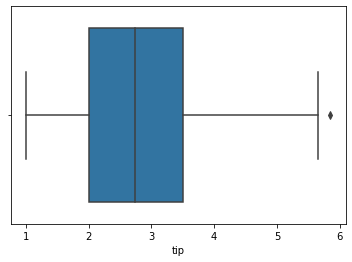

In [272]:
sns.boxplot(df_result['tip'])

### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [249]:
le=LabelEncoder()

In [251]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [256]:
df.iloc[:,[2,3,4,5]]=df.iloc[:,[2,3,4,5]].apply(le.fit_transform)

In [257]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [264]:
df_max=df['total_bill'].max()
df_max

50.81

In [265]:
df_min=df['total_bill'].min()
df_min

3.07

In [267]:
df_range=df_max-df_min
print(df_range)

47.74


In [273]:
mms = MinMaxScaler()
tips_ds_mms = mms.fit_transform(df)

In [276]:
tips_ds_mms_df = pd.DataFrame(tips_ds_mms,
                              columns = df.columns)
tips_ds_mms_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,0.291579,0.001111,0.0,0.0,0.666667,0.0,0.2
1,0.152283,0.073333,1.0,0.0,0.666667,0.0,0.4
2,0.375786,0.277778,1.0,0.0,0.666667,0.0,0.4
3,0.431713,0.256667,1.0,0.0,0.666667,0.0,0.2
4,0.450775,0.290000,0.0,0.0,0.666667,0.0,0.6


In [288]:
df_range=(tips_ds_mms_df['total_bill'].max()-tips_ds_mms_df['total_bill'].min())
df_range

0.9999999999999999

### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [290]:
df_tip=df
df_tip.iloc[:,[2,3,4,5]]=df_tip.iloc[:,[2,3,4,5]].apply(le.fit_transform)

In [291]:
df_tip

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,1,0,3
240,27.18,2.00,0,1,1,0,2
241,22.67,2.00,1,1,1,0,2
242,17.82,1.75,1,0,1,0,2


<AxesSubplot:>

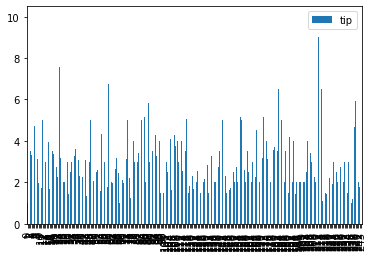

In [298]:
df_tip.plot(kind="bar",y="tip")

### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [303]:
x=np.array(df).reshape(-1,1)
x.shape

(1708, 1)

In [306]:
y=np.array(df).reshape(-1,1)
y.shape

(1708, 1)

In [309]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [311]:
x_test.shape

(513, 1)

In [312]:
y_train.shape

(1195, 1)

In [313]:
y_test.shape

(513, 1)

In [324]:
df_norm = (df-df.min())/(df.max()-df.min())
df_norm

,total_bill,tip,sex,smoker,day,time,size
0,0.291579,0.001111,0.0,0.0,0.666667,0.0,0.2
1,0.152283,0.073333,1.0,0.0,0.666667,0.0,0.4
2,0.375786,0.277778,1.0,0.0,0.666667,0.0,0.4
3,0.431713,0.256667,1.0,0.0,0.666667,0.0,0.2
4,0.450775,0.290000,0.0,0.0,0.666667,0.0,0.6
...,...,...,...,...,...,...,...
239,0.543779,0.546667,1.0,0.0,0.333333,0.0,0.4
240,0.505027,0.111111,0.0,1.0,0.333333,0.0,0.2
241,0.410557,0.111111,1.0,1.0,0.333333,0.0,0.2
242,0.308965,0.083333,1.0,0.0,0.333333,0.0,0.2


### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [325]:
from sklearn.linear_model import LinearRegression

In [328]:
model = LinearRegression()

In [329]:
model.fit(x_train, y_train)

LinearRegression()

In [332]:
r_sq = model.score(x_test, y_test)
r_sq

1.0

### Happy Learning:)